In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
from IPython.display import Audio
from numpy.fft import fft, ifft

# helps us to plot the graphs inline
%matplotlib inline

In [6]:
# reading the audio file 
Fs, data = read('./hello_ahbar-Copy1.wav')

# we need only one channel therefore channel 0 is selected
data = data[:,0] 

print("Sampling Frequency is: ", Fs)
print("min:", min(data), "max:", max(data))
# print(data[10000:10100])

Sampling Frequency is:  16000
min: -8573 max: 5654


In [7]:
Audio(data, rate=Fs)    # this is the original audio 

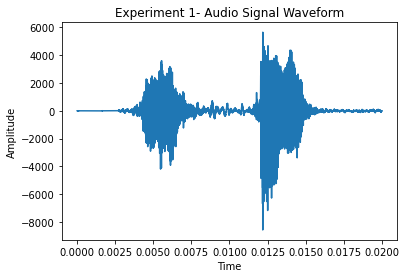

In [8]:
plt.figure()
time = np.linspace(0., 0.02, data.shape[0])
plt.plot(time, data)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Experiment 1- Audio Signal Waveform')
plt.show()

In [9]:
from scipy import signal
x = data 
fs = Fs

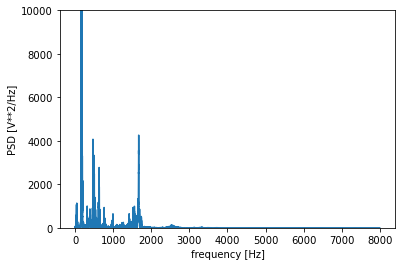

In [10]:
# plotting the PSD of the signal 
f, Pxx_den = signal.periodogram(x, fs)
plt.plot(f, Pxx_den)
plt.ylim([0, 1e4])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [11]:

#Quantization with 16 levels uniform and enocding 

minimmum = min(data) 
maximmum = max(data)

interval_length = (maximmum - minimmum) / 16

print("length of each interval:", interval_length)

intervals = []
keys = [format(i, "04b") for i in range(0, 16)]
# print(keys)

# create intervals 
for i in range(0, 16):
    intervals.append((minimmum + i*interval_length, minimmum + (i+1)*interval_length))

print(len(intervals))

quants = [] # holds the quantized values 
bit_code = [] # holds the bit codes 

for d in data:    
    for i in range(0, 16):
        li = intervals[i][0]
        ri = intervals[i][1]

        if d >= li and d <= ri:
            quants.append(i)
            bit_code.append(keys[i])
            break

            
print("min quant level: ", min(quants), "max quant level: ", max(quants))
# print("quantized data: ", quants[1000:10000])
print("sample encoded data: ", bit_code[9000:9010])

length of each interval: 889.1875
16
min quant level:  0 max quant level:  15
sample encoded data:  ['1011', '1100', '1011', '1011', '1010', '1001', '1001', '1001', '1010', '1010']


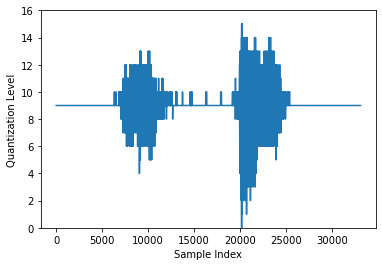

In [12]:
# plot the quantized values 
plt.plot(quants)
plt.ylim([0, 16])
plt.xlabel('Sample Index')
plt.ylabel('Quantization Level')
plt.show()

In [13]:
Audio(quants, rate=Fs)  #listen to the audio generated after quantization

[0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0]


Text(0, 0.5, 'Voltage Level')

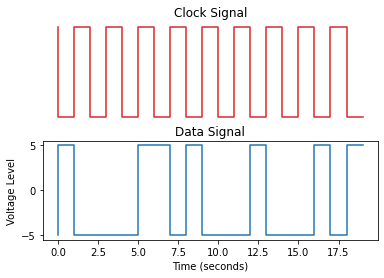

In [99]:
# Line Encoding using Polar NRZ Level, high voltage = 5, low voltage = -5
# high voltage => 0 bit, low voltage => 1 bit

# taking 20 bits 
sample_bits = bit_code[9000:9005]

sample_bits = ''.join(sample_bits)

encoded_signal = []
t = []
clock = [0]

i = 0
for bit in sample_bits:
    clock.append(~clock[i])
    t.append(i)
    i += 1
    if bit == '0':
        encoded_signal.append(5)
    else:
        encoded_signal.append(-5)

print(clock)
# print(encoded_signal)
fig, axs = plt.subplots(2, sharex=True)
axs[0].set_title("Clock Signal")
axs[0].label_outer()
axs[0].step(t, clock[0:len(encoded_signal)], 'tab:red')
# axs[0].set_frame_on(True)
axs[0].set_axis_off()
axs[1].set_title("Data Signal")
axs[1].step(t, encoded_signal)
axs[1].set_xlabel('Time (seconds)')
axs[1].set_ylabel('Voltage Level')
# axs[1].set_ylim(-5, 5)
# axs[1].set_xlim(0, 20)
# axs[0].ylim([-10, 10])


